# Heirarchical Clustering Toy Problem

In [3]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage #this will be useful for heirarchical Clusters
import numpy as np
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

# Generate Toy Data

(20L, 2L)


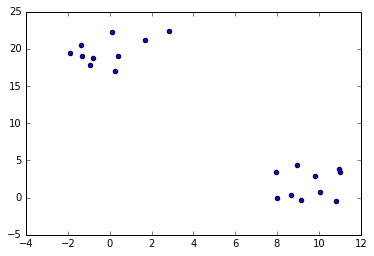

In [4]:
# generate two clusters: a with 10 points, b with 10:
np.random.seed(1)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[10,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[10,])
#The multivariate normal is a generalization of the one-dimensional normal distribution to higher
#dimensions.  Such a distribution is specified by its mean and covariance matrix. 
#These parameters are analogous to the mean (average or "center") and variance 
#(standard deviation, or "width," squared) of the one-dimensional normal distribution.

X = np.concatenate((a, b))
print X.shape  # 20 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.show()

In [5]:
#We can clearly identify that there are 2 clusters here. 
#lets see if Heirarchical clustering also gives us this conclusion.

# The Process

In [6]:
# generate the linkage matrix
Z = linkage(X, 'ward')
#This tell you which datapoint merged with with other data point--
#of course the points with smallest distance merged first

#What is this WARD??

#'ward' is one of the methods that can be used to calculate
#the distance between newly formed clusters.

#other common linkage methods like 'single', 'complete', 'average',
#... and the different distance metrics like 'euclidean' (default), Manhattan,'cosine' etc

In [7]:
#for example lets see the first 5 records in Z
Z[:15]
#this tells us the following. there are 4 columns
#Column 1--- Datapoint # ( 0 to 19 as we have 20 points, if this # is > 19 it means it is a Cluster)
#Column 2- same as above
#Column 3-- Distance between the points / cluster
#Column 4-- # of points merged

#In the first row- 0 (index/datapoint no.) merged with datapoint no. 3. the distance between them
#was 0.34673--- the merging took place between 2 points hence 2 as the last value
# the second merging too place between point #'s 15 & 17. dist between them was 0.59441 and 2 as the
#merging happened between 2 points

#In Row 4th--point # 6 merges with Cluster # 22 ( this is the cluster formed in Row3rd)
#Cluster formed in Row First-- is indexed 20, Row Second indexed 21 and so on...

array([[  0.     ,   3.     ,   0.34673,   2.     ],
       [ 15.     ,  17.     ,   0.59441,   2.     ],
       [  1.     ,   8.     ,   0.82165,   2.     ],
       [  6.     ,  22.     ,   1.05614,   3.     ],
       [ 16.     ,  21.     ,   1.14153,   3.     ],
       [  2.     ,   5.     ,   1.33531,   2.     ],
       [ 10.     ,  18.     ,   1.40539,   2.     ],
       [  4.     ,   9.     ,   1.41544,   2.     ],
       [  7.     ,  20.     ,   1.5527 ,   3.     ],
       [ 11.     ,  19.     ,   1.67079,   2.     ],
       [ 13.     ,  24.     ,   1.77004,   4.     ],
       [ 14.     ,  26.     ,   2.10625,   3.     ],
       [ 12.     ,  29.     ,   2.51105,   3.     ],
       [ 23.     ,  27.     ,   2.84976,   5.     ],
       [ 25.     ,  28.     ,   3.43227,   5.     ]])

# Dendogram

In [8]:
#A dendrogram is a visualization in form of a tree showing the order 
#and distances of merges during the hierarchical clustering.

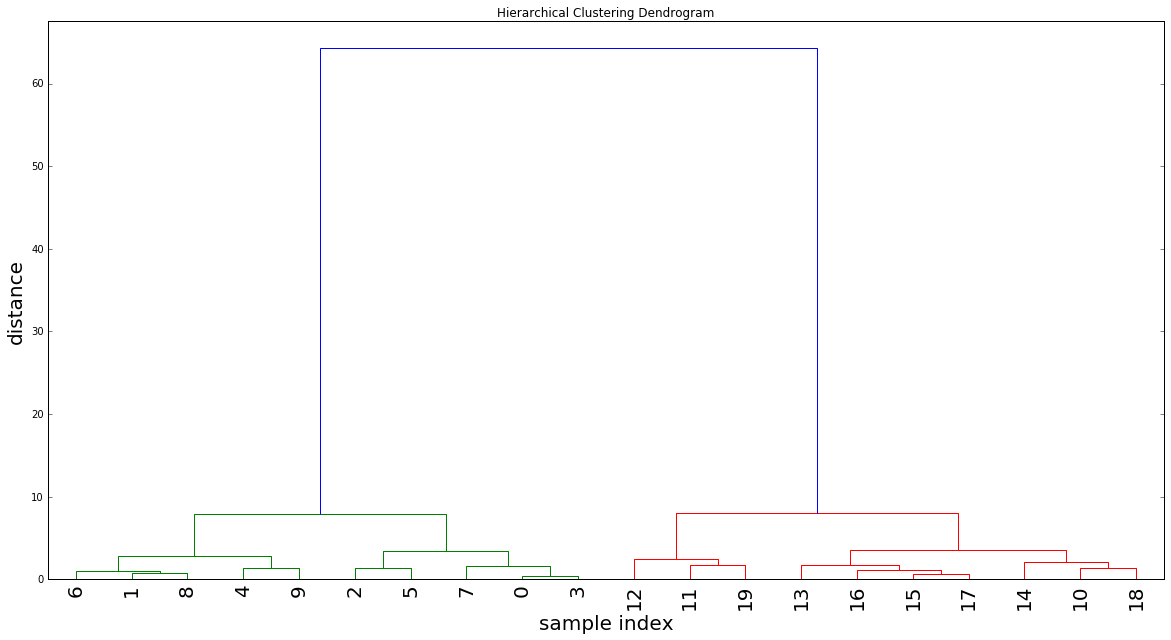

In [9]:
# calculate full dendrogram
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index',fontsize=20)
plt.ylabel('distance',fontsize=20)
dendrogram(Z,leaf_rotation=90.,leaf_font_size=20)
# leaf_rotation -----rotates the x axis labels
# leaf_font_size----font size for the x axis labels
plt.show()

In [10]:
#Info we get from the dendogram----

#the above dendogram shows which points are merged and when..
#we can see that the first merging takes places as shown by the Distance aray Z

#The height of that horizontal line tells you about the distance at which 
#this label was merged into another label or cluster

# Selecting the Number of Clusters

In [11]:
#Imagibe a horizontal line and drop it from top of the dendogram
# the max up-down free movement the Horizontal line has before touching any other
#Horizonal line is the best Choice. You shud freeze the H line there.
#Then
#simply count the number of intersections with vertical lines of the dendrogram to 
#get the number of formed clusters.
#in the above Dendogram the Line shud be Stpped where it gives 2 Clusters
#the Cluster formed are as belwo-

#CLSTER 1 ---- with poits-- 1,6,8,4,9,25,7,0,3

#CLISTER 2 ---- with poits--12,11,19,13,16,15,17,14,10,18

In [12]:
from scipy.cluster.hierarchy import fcluster
k=2 #from the dendogram
clusters = fcluster(Z, k, criterion='maxclust') 
print clusters

[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


# Visualizing Your Clusters

In [13]:
#f you're lucky enough and your data is very low dimensional, 
#you can actually visualize the resulting clusters very easily:

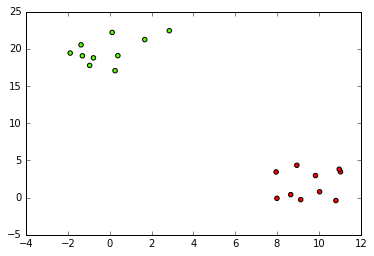

In [14]:
plt.figure(figsize=(6, 4))
plt.scatter(X[:,0], X[:,1],c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

In [ ]:
#Hope you enjoyed this -- - 